In [2]:
import numpy as np 
import pandas as pd 
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ensayo3_excel = r"C:\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Documents\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [4]:
ensayo3_dict.keys ()

dict_keys(['Sujeto1', 'Sujeto2', 'Sujeto3', 'Sujeto4', 'Sujeto5', 'Sujeto6', 'Sujeto7', 'Sujeto8', 'Sujeto9', 'Sujeto10', 'Sujeto11', 'Sujeto12', 'Sujeto13', 'Sujeto14', 'Sujeto15', 'Sujeto16', 'Sujeto17', 'Sujeto18', 'Sujeto19', 'Sujeto20', 'Sujeto21', 'Sujeto22', 'Sujeto23', 'Sujeto24', 'Sujeto25', 'Sujeto26', 'Sujeto27', 'Sujeto28', 'Sujeto29', 'Sujeto30', 'Sujeto31', 'Sujeto32', 'Sujeto33', 'Sujeto34', 'Sujeto35', 'Sujeto36', 'Sujeto37', 'Sujeto38', 'Sujeto39', 'Sujeto40', 'Sujeto41', 'Sujeto42', 'Sujeto43', 'Sujeto44', 'Sujeto45', 'Sujeto46', 'Sujeto47', 'Sujeto48', 'Sujeto49', 'Sujeto50', 'Sujeto51', 'Sujeto52', 'Sujeto53', 'Sujeto54', 'Sujeto55', 'Sujeto56', 'Sujeto57', 'Sujeto58', 'Sujeto59', 'Sujeto60', 'Sujeto61', 'Sujeto62', 'Sujeto63', 'Sujeto64', 'Sujeto65', 'Sujeto66', 'Sujeto67', 'Sujeto68', 'Sujeto69', 'Sujeto70', 'Sujeto71', 'Sujeto72', 'Sujeto73', 'Sujeto74', 'Sujeto75', 'Sujeto76', 'Sujeto77', 'Sujeto78', 'Sujeto79', 'Sujeto80', 'Sujeto81', 'Sujeto82', 'Sujeto83', 'S

In [5]:
ensayos_dfs = []
for sujeto in ensayo3_dict.keys ():
    ensayos_dfs.append(ensayo3_dict[sujeto])

In [6]:
ensayo4_dict

{'Sujeto1':           Fc5.      Fc3.      Fc1.      Fcz.      Fc2.      Fc4.      Fc6.  \
 Fc5.  0.000000  0.870957  0.710665  0.529520  0.469852  0.382340  0.249304   
 Fc3.  0.870957  0.000000  0.917965  0.729830  0.645444  0.518531  0.325887   
 Fc1.  0.710665  0.917965  0.000000  0.897451  0.812659  0.655140  0.403767   
 Fcz.  0.529520  0.729830  0.897451  0.000000  0.924849  0.769425  0.476861   
 Fc2.  0.469852  0.645444  0.812659  0.924849  0.000000  0.914422  0.620686   
 ...        ...       ...       ...       ...       ...       ...       ...   
 Po8.  0.101032  0.113357  0.114103  0.101519  0.118443  0.130243  0.108007   
 O1..  0.270660  0.261597  0.232685  0.188514  0.193098  0.181576  0.132591   
 Oz..  0.213809  0.216263  0.200524  0.167797  0.178926  0.176395  0.132484   
 O2..  0.131290  0.135832  0.129546  0.110171  0.124632  0.130839  0.104698   
 Iz..  0.188345  0.175120  0.155379  0.127943  0.135894  0.135652  0.104863   
 
           C5..      C3..      C1..  ..

In [7]:
# Filtrado de matrices 
threshold = 0.5
porcentaje = 0.6
# conjuntamos las matrices 
stack = np.stack([df.values for df in ensayos_dfs])
above = stack > threshold
# Aplicamos filtro a cada matriz 
N = len(ensayos_dfs) # = 109
count_above = above.sum(axis=0) # contando cuantos valores superan el umbral en la celda 

min_requerido = int ((np.ceil)(porcentaje*N)) # ciel redondea hacia arriba , 0.6*109 = 65.4
# con esto bastara con quedarnos con las celdas de above que cumplan con min_requerido para así tener el # de sujetos que superan el umbral 
result_bool = count_above >= min_requerido

result_df = pd.DataFrame(result_bool, 
                         index=ensayos_dfs[0].index, 
                         columns=ensayos_dfs[0].columns).astype(int)

In [8]:
stack.shape

(109, 64, 64)

<Axes: >

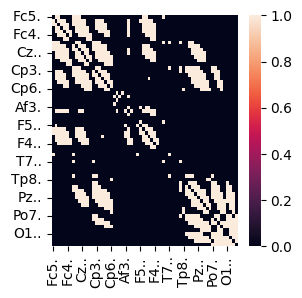

In [9]:
plt.figure(figsize=(3,3))

sns.heatmap(result_df)

# Generar estadísticos para decidir umbrales

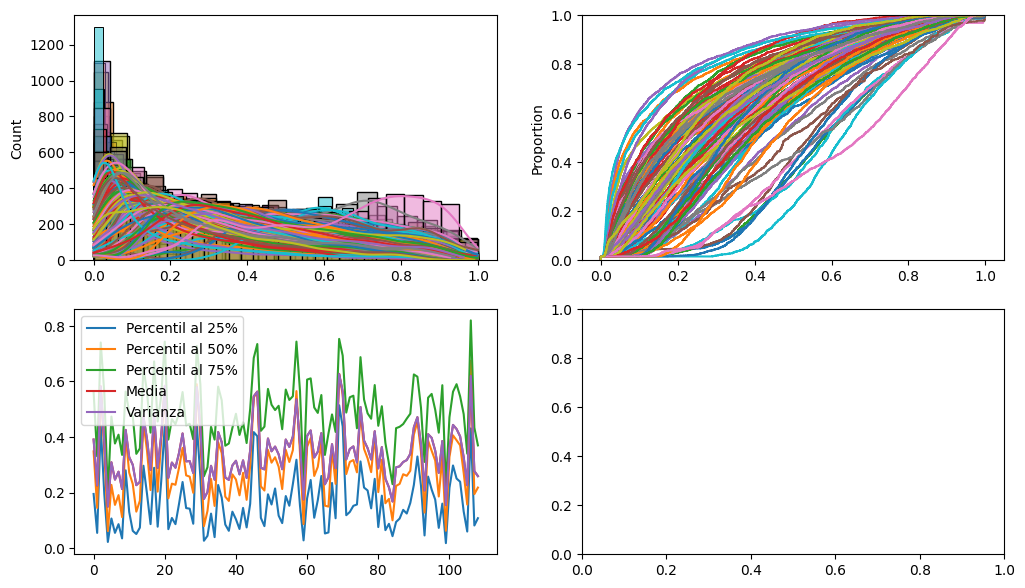

In [10]:
ensayos_dfs

th25, th50,th75, promedio,varianza = [], [], [], [], []


fig, axes = plt.subplots (2, 2, figsize = (12, 7))
for sujeto in ensayos_dfs:
    # calculos estadísticos 
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data)) 
    varianza.append(np.mean(data))
    # a plotear maria 
    sns.histplot(sujeto.stack().values, ax=axes [0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes [0][1])
axes[1][0].plot(th25, label= 'Percentil al 25%')
axes[1][0].plot(th50, label= 'Percentil al 50%')
axes[1][0].plot(th75, label= 'Percentil al 75%')
axes[1][0].plot(promedio, label= 'Media')
axes[1][0].plot(varianza, label= 'Varianza')
axes[1][0].legend()

In [11]:
from scipy import stats
stats.median_abs_deviation(th25)

np.float64(0.06955915283857339)

In [12]:
estadisticos_df = pd.DataFrame(columns= ['th25', 'th50', 'th75', 'promedio', 'mu_sigma'])

columnas = [th25  ,th50, th75, promedio, mu_sigma]

estadísticos_df.iloc[0] = np.min(columnas[0])
estadísticos_df.iloc[0] = np.max(columnas[0])
estadísticos_df.iloc[0] = np.median(columnas[0])
estadísticos_df.iloc[0] = np.med(columnas[0])
estadísticos_df.iloc[0] = np.med(columnas[0])

NameError: name 'mu_sigma' is not defined

In [ ]:
estadisticos_df